In [1]:
import csv
import numpy as np
d04={}

with open("201904.csv","r",encoding='euckr') as k:
    reader = csv.reader(k,delimiter='\t')
    next(reader)
    for row in reader:
        d04[row[1]+"__"+row[2]]=np.array(list(map(int,row[3:-1])))
        
d05={}

with open("201905.csv","r",encoding='euckr') as k:
    reader = csv.reader(k,delimiter='\t')
    next(reader)
    for row in reader:
        d05[row[1]+"__"+row[2]]=np.array(list(map(int,row[3:-1])))


In [2]:
ni={}
no={}
nn={}

for i in d05.keys():
    no[i]=(d04[i][1::2]+d05[i][1::2])/2
    ni[i]=(d04[i][::2]+d05[i][::2])/2
    nn[i]=ni[i]-no[i]
    for j in range(23):
        nn[i][j+1]+=nn[i][j]

#print(nn.values())
import matplotlib.pyplot as plt
for i in nn.values():
    plt.plot(i)
#plt.plot(no.values())
plt.show()

<Figure size 640x480 with 1 Axes>

In [3]:
nh={}
for i in nn.keys():
    nh[i]=nn[i]/(max([max(abs(nn[i])),300000]))

595


G:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
G:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
G:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


60


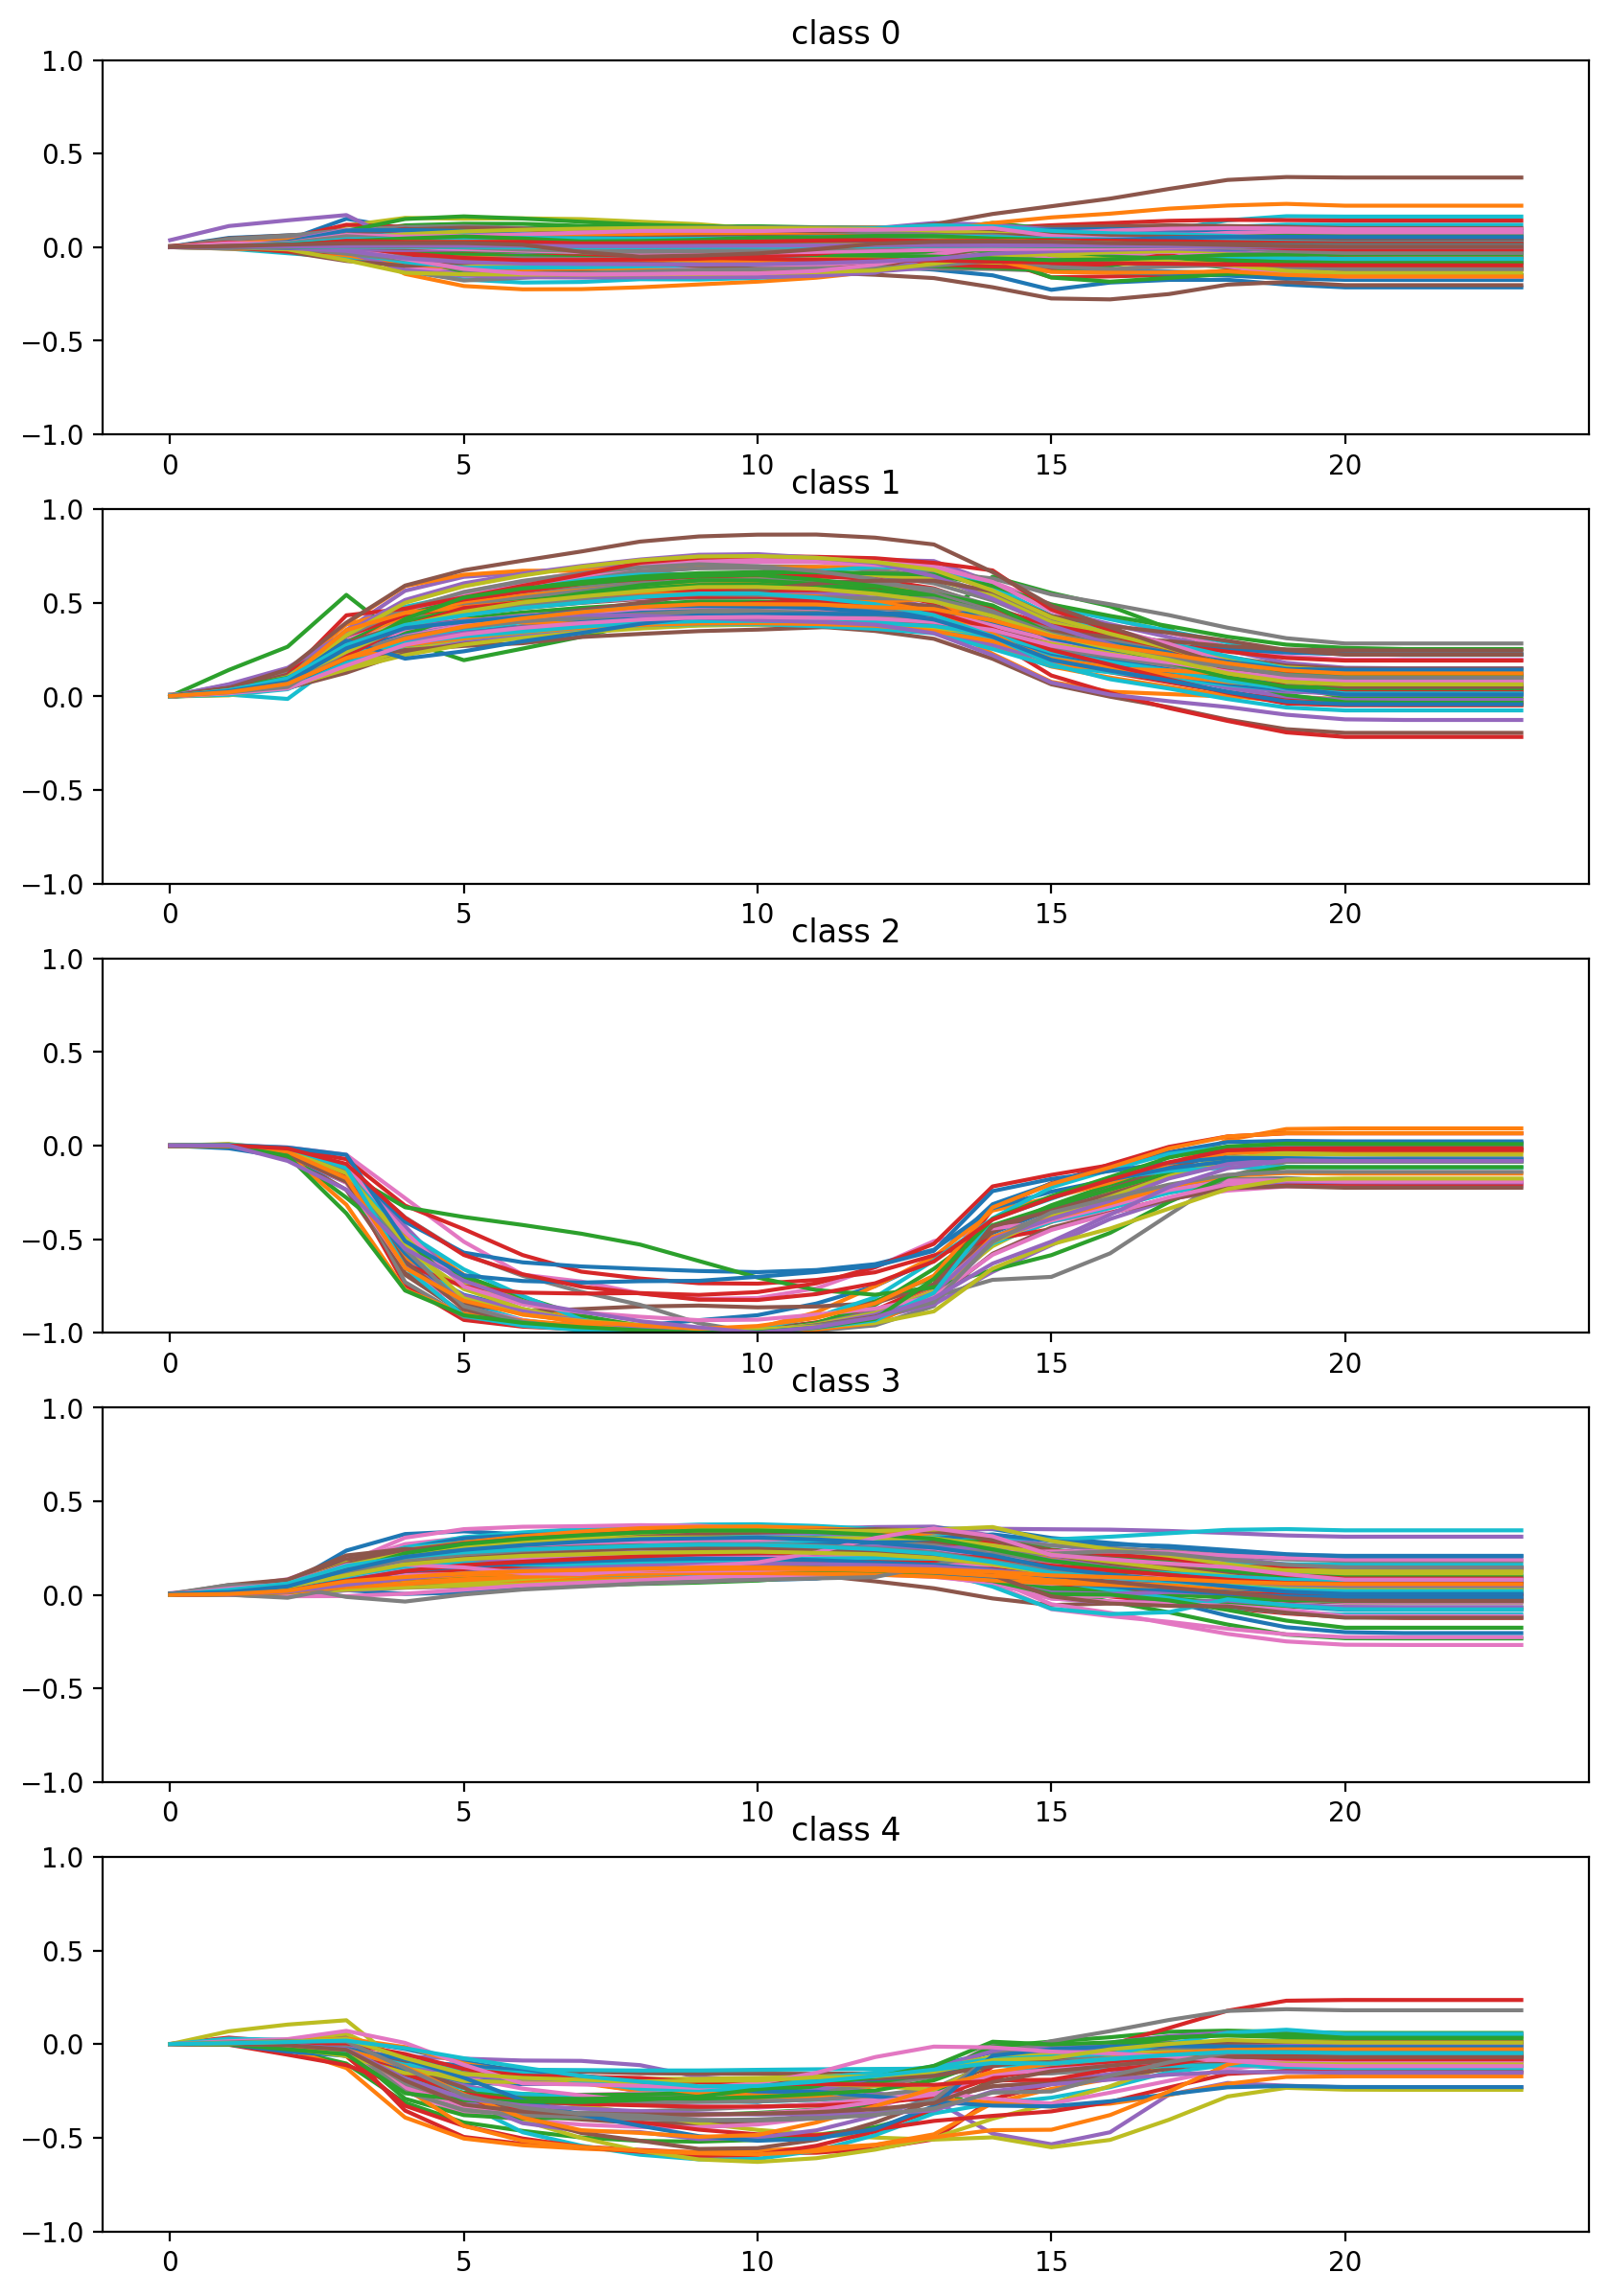

In [4]:
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM

nana=list(nh.values())
print(len(nana))
clf = IsolationForest()
ont=clf.fit_predict(nana)
on=np.where(ont == -1)[0]
print(len(on))

noht=[]
for i in range(len(nana)):
    if i not in on:
        noht.append(nana[i])

nohtv=np.array(noht)

clustersz=5#int((len(nohtv)/2)**0.5)
km = KMeans(n_clusters=clustersz,max_iter=100000,n_init=100)
kres = km.fit_predict(nohtv)

fig, axs = plt.subplots(clustersz,1,figsize=(10,clustersz*3),dpi=200)
for i in range(clustersz):
    li=np.where(kres == i)[0]
    axs[i].set_title(f"class {i}")
    axs[i].set_ylim([-1.0,1.0])
    for j in li:
        axs[i].plot(nohtv[j])
plt.show()
fig.savefig("subwayclass.png")

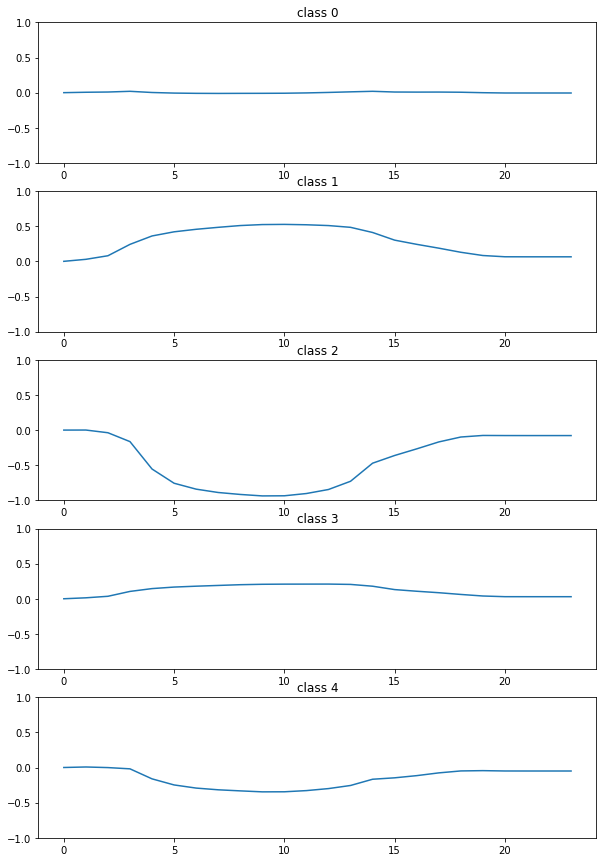

In [5]:
fig, axs = plt.subplots(clustersz,1,figsize=(10,clustersz*3))

for i in range(clustersz):
    axs[i].set_title(f"class {i}")
    li=np.where(kres == i)[0]
    axs[i].set_ylim([-1.0,1.0])
    avg=np.array([0.0]*24)
    for j in li:
        avg+=nohtv[j]
    avg/=len(li)
    axs[i].plot(avg)
plt.show()
fig.savefig('subwayclassavg.png')

In [6]:
import csv
cj={}

    
di={
    "1":"1호선","2":"2호선","3":"3호선","4":"4호선",
    "5":"5호선","6":"6호선","7":"7호선","8":"8호선",
    "9":"9호선","I": "인천1호선", "K": "경의중앙선",
    'B': '분당선', 'A': '공항철도', 'G': '경춘선',
    'S':'신분당선', 'SU':'수인선', 'E':'에버라인',
    'I2':'인천2호선', 'KK': '경강선', 'T':'테스트',
    'U':'의정부', 'UI':'우이신설선'
}
with open('stloc.csv', 'r', encoding='utf-8') as k:
    r = csv.reader(k)
    next(r)
    for i in r:        
        if i[1]=='서울':
            i[1]='서울역'
        co=di[i[2]]+"__"+i[1]
        if co in nh.keys():
            cj[co]=[i[-2],i[-1]]

with open('subwayclass.csv', 'w+', encoding='utf-8') as k:
    w = csv.writer(k,lineterminator='\n')
    idxcor=0
    for i,j in enumerate(cj.keys()):        
        if i in on:
            w.writerow([j.split("__")[0],j.split("__")[1],100,*cj[j]])
            idxcor+=1
        else:
            w.writerow([j.split("__")[0],j.split("__")[1],kres[i-idxcor],*cj[j]])

